In [2]:
import ase.calculators.emt as emt
import ase.io as io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
completeInfo = {}
maxAtoms = 32
FOLDER = 'AuNFiles'
for nAtoms in range(2, maxAtoms + 1):
  atoms = io.Trajectory(f'{FOLDER}/minimaAu{nAtoms}.traj')
  step = 0
  minimaEnergy = np.inf
  minimaStep = 0
  for energy in [atom.get_potential_energy() for atom in atoms]:
    if energy < minimaEnergy:
      minimaEnergy = energy
      minimaStep = step
    step += 1
  completeInfo[nAtoms] = {
    'minimaEnergy': minimaEnergy,
    'recordedStep': minimaStep
  }

In [5]:
for nAtoms in range(2, maxAtoms + 1):
  with open(f'{FOLDER}/hopAu{nAtoms}.log', 'r') as f:
    step = 0
    recordedStep = 0
    while True:
      line = f.readline()
      if "msg: Run terminated." in line:
        break
      if "msg: Molecular dynamics" in line:
        step = int(line.split()[3].strip("md"))
      if "msg: Recorded minima" in line:
        recordedStep = int(line.split()[3].strip(".").strip("#"))
      if recordedStep == completeInfo[nAtoms]['recordedStep']:
        completeInfo[nAtoms]['step'] = step
        break
with open(f"{FOLDER}/timeSummary.txt", "r") as f:
  for line in f.readlines():
    nAtoms = int(line.split("|")[0].strip("Au"))
    completeInfo[nAtoms]['time'] = float(line.split("|")[1].split()[1])
      

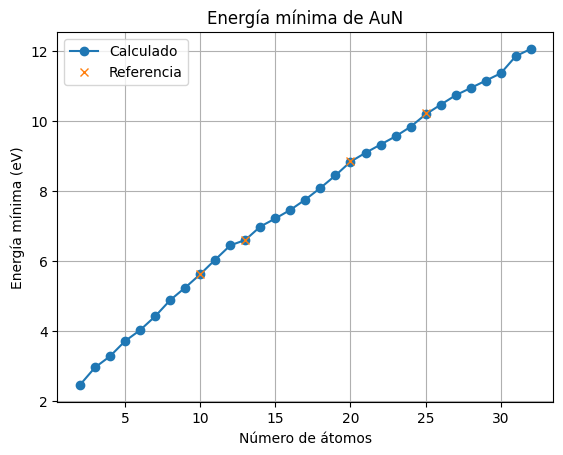

In [6]:
knownMinima = {
  10: 5.62,
  13: 6.591, 
  20: 8.84,
  25: 10.225
  # 55: 17.215
}
energyMins = list(map(lambda x: x['minimaEnergy'], completeInfo.values()))
plt.plot(completeInfo.keys(), energyMins, '-o')
plt.plot(knownMinima.keys(), knownMinima.values(), 'x')
plt.xlabel('Número de átomos')
plt.ylabel('Energía mínima (eV)')
plt.title('Energía mínima de AuN')
plt.legend(['Calculado', 'Referencia'])
plt.grid()

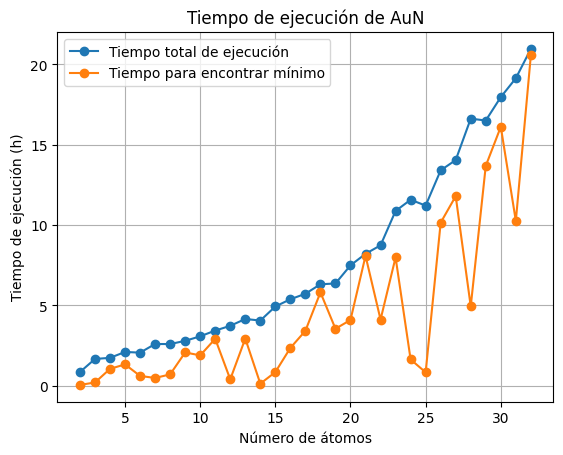

In [7]:
timeToMin = np.array(list(map(lambda x: x['step'] * x['time']/1000, completeInfo.values())))
timeToMin /= 3600
timeExecution = np.array(list(map(lambda x: x['time'], completeInfo.values())))
timeExecution /= 3600
plt.plot(completeInfo.keys(), timeExecution, '-o', label='Tiempo total de ejecución')
plt.plot(completeInfo.keys(), timeToMin, '-o', label='Tiempo para encontrar mínimo')
plt.xlabel('Número de átomos')
plt.ylabel('Tiempo de ejecución (h)')
plt.title('Tiempo de ejecución de AuN')
plt.grid()
plt.legend()
